In [81]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt   #Data visualisation libraries 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv( "TaxiFare.csv")

In [82]:
# Creation of training set , development set, Testing set
train_set = data
test_set = data
dev_set = data.sample(n = 10000)# 10000 random data from same distribution

# Shape, data type, data sample and descriptive statistics of Train Set

## Shape

In [83]:
train_set.shape

(50000, 8)

## Data type

In [84]:
train_set.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

## Data Sample

In [5]:
train_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Descriptive statistics

In [6]:
train_set.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Shape, data type, data sample and descriptive statistics of Development Set

## Shape

In [7]:
dev_set.shape

(10000, 8)

## Datatype

In [8]:
dev_set.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

## Data Sample

In [9]:
dev_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
31419,54:00.0,4.5,2011-08-05 22:54:00 UTC,-73.966232,40.756073,-73.974018,40.751165,1
37658,48:18.0,4.5,2013-01-03 06:48:18 UTC,-73.976389,40.755492,-73.985983,40.757071,1
24950,38:00.0,5.0,2012-09-26 11:38:00 UTC,-73.957280,40.800222,-73.949778,40.793720,1
17068,12:00.0,10.1,2009-04-25 01:12:00 UTC,-73.994217,40.726452,-73.985068,40.760848,2
5392,54:00.0,4.5,2011-11-05 12:54:00 UTC,-73.979552,40.766448,-73.985712,40.761210,5


## Descriptive statistics

In [10]:
dev_set.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.265919,-72.613450,39.983824,-72.583674,39.963174,1.696800
std,9.580333,10.040491,5.836809,10.140941,5.906905,1.318121
min,-2.500000,-75.336082,-73.986968,-84.654241,-74.001000,0.000000
25%,6.000000,-73.992214,40.734950,-73.991193,40.734105,1.000000
50%,8.500000,-73.982013,40.752739,-73.980124,40.753270,1.000000
75%,12.500000,-73.967885,40.767232,-73.963757,40.768125,2.000000
max,200.000000,40.763957,41.650000,40.851027,41.391042,6.000000


# Shape, data type, data sample and descriptive statistics of Test Set

## Shape

In [11]:
test_set.shape

(50000, 8)

## Data type

In [12]:
test_set.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

## Data sample

In [13]:
test_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Descriptive statistics

In [14]:
test_set.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Data cleaning

## Removing Null values from the Train set

In [15]:
train_set.isnull().sum().sort_values(ascending = False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [16]:
dev_set.isnull().sum().sort_values(ascending = False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [17]:
test_set.isnull().sum().sort_values(ascending = False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [18]:
train_set = train_set.drop(train_set[train_set.isnull().any(1)].index , axis = 0)
train_set.shape

(50000, 8)

In [19]:
dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
dev_set.shape

(10000, 8)

In [20]:
test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
test_set.shape

(50000, 8)

# Removing rows from the dataset having invalid data

In [21]:
train_set.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [22]:
train_set.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

## Train_set has negative values for amount which should be removed

In [23]:
train_set=train_set.drop(train_set[train_set["amount"]<0].index,axis=0)
train_set.shape

(49994, 8)

In [24]:
train_set["amount"].describe()

count    49994.000000
mean        11.365903
std          9.684843
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [25]:
train_set["no_of_passenger"].describe()

count    49994.000000
mean         1.667860
std          1.289213
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [26]:
train_set.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

## Checking for duplicate values

In [27]:
duplicate=train_set.duplicated()
print(duplicate.sum())
train_set[duplicate]

0


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


# Data visualisation 

Text(0, 0.5, 'Frequency')

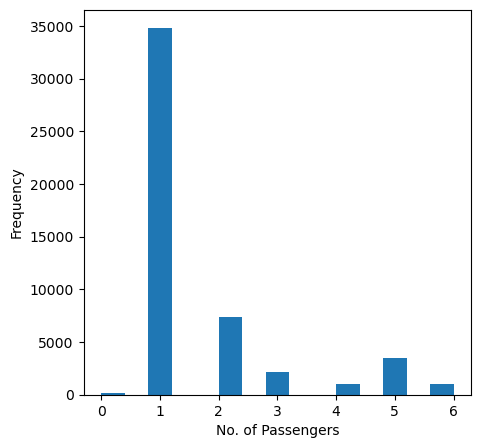

In [28]:
plt.figure(figsize=(5,5))
plt.hist(train_set['no_of_passenger'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

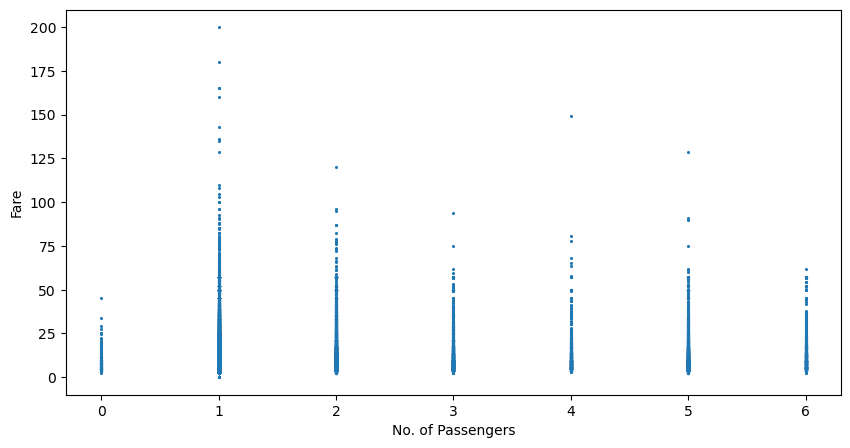

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_set['no_of_passenger'], y=train_set['amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

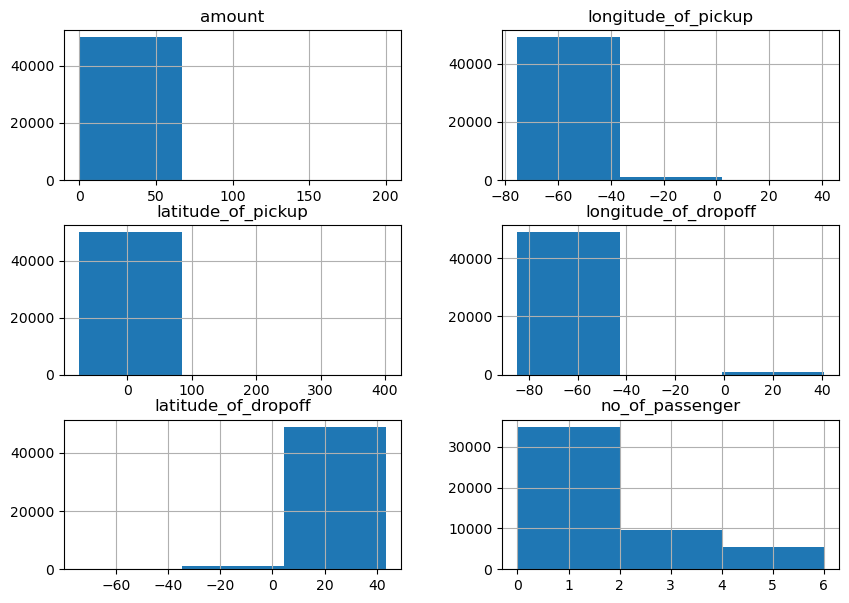

In [30]:
train_set.hist(bins=3, figsize=(10,7))
plt.show()

## Removing invalid Longitude and Latitude

In [31]:
train_set[['longitude_of_pickup','latitude_of_pickup']].describe()

,longitude_of_pickup,latitude_of_pickup
count,49994.000000,49994.000000
mean,-72.509586,39.933665
std,10.394472,6.225225
min,-75.423848,-74.006893
25%,-73.992062,40.734883
50%,-73.981840,40.752679
75%,-73.967153,40.767361
max,40.783472,401.083332


In [32]:
train_set[['longitude_of_dropoff','latitude_of_dropoff']].describe()

,longitude_of_dropoff,latitude_of_dropoff
count,49994.000000,49994.000000
mean,-72.505922,39.926970
std,10.403131,6.012441
min,-84.654241,-74.006377
25%,-73.991152,40.734375
50%,-73.980082,40.753373
75%,-73.963585,40.768167
max,40.851027,43.415190


Valid Longitude value = -180 to 180

Valid Latitude value = -90 to 90

Remove pickup cordinates and drop off cordinates which dont fall in this range

Remove invalid pickup cordinates

In [33]:
print("Number of invalid pickup cordinates = ",len((train_set[train_set['latitude_of_pickup']>90])))

Number of invalid pickup cordinates =  1


In [34]:
train_set = train_set.drop(((train_set[train_set['latitude_of_pickup']>90])).index,axis=0)
train_set.shape

(49993, 8)

# Distance between pick up location and drop off location

The distance in a sphere can be calculated when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [35]:
def haversine_distance(train_set):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = train_set[['longitude_of_pickup','latitude_of_pickup']]
    dropoff_data = train_set[['longitude_of_dropoff','latitude_of_dropoff']]
    
    phi1 = np.radians(pickup_data['latitude_of_pickup'])
    phi2 = np.radians(dropoff_data['latitude_of_dropoff'])
    
    delta_phi = np.radians(dropoff_data['latitude_of_dropoff'] - pickup_data['latitude_of_pickup'])
    delta_lambda = np.radians(dropoff_data['longitude_of_dropoff'] - pickup_data['longitude_of_pickup'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d

In [36]:
train_set_distance = pd.DataFrame(haversine_distance(train_set) , columns=['Distance'])
train_set = pd.concat([train_set , train_set_distance] , axis = 1)

In [37]:
dev_set_distance = pd.DataFrame(haversine_distance(dev_set) , columns=['Distance'])
dev_set = pd.concat([dev_set , dev_set_distance] , axis = 1)

In [38]:
dev_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
31419,54:00.0,4.5,2011-08-05 22:54:00 UTC,-73.966232,40.756073,-73.974018,40.751165,1,0.853205
37658,48:18.0,4.5,2013-01-03 06:48:18 UTC,-73.976389,40.755492,-73.985983,40.757071,1,0.826951
24950,38:00.0,5.0,2012-09-26 11:38:00 UTC,-73.957280,40.800222,-73.949778,40.793720,1,0.959952
17068,12:00.0,10.1,2009-04-25 01:12:00 UTC,-73.994217,40.726452,-73.985068,40.760848,2,3.901551
5392,54:00.0,4.5,2011-11-05 12:54:00 UTC,-73.979552,40.766448,-73.985712,40.761210,5,0.779989


In [39]:
train_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [40]:
train_set.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
count,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000
mean,11.366065,-72.509558,39.926441,-72.505893,39.926952,1.667874,18.337855
std,9.684873,10.394574,6.012083,10.403233,6.012500,1.289222,353.488617
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000
25%,6.000000,-73.992062,40.734882,-73.991152,40.734375,1.000000,1.223337
50%,8.500000,-73.981840,40.752679,-73.980083,40.753372,1.000000,2.120196
75%,12.500000,-73.967155,40.767360,-73.963587,40.768167,2.000000,3.895481
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,8667.818812


In [41]:
train_set.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
Distance                float64
dtype: object

In [42]:
dev_set.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
31419,54:00.0,4.5,2011-08-05 22:54:00 UTC,-73.966232,40.756073,-73.974018,40.751165,1,0.853205
37658,48:18.0,4.5,2013-01-03 06:48:18 UTC,-73.976389,40.755492,-73.985983,40.757071,1,0.826951
24950,38:00.0,5.0,2012-09-26 11:38:00 UTC,-73.957280,40.800222,-73.949778,40.793720,1,0.959952
17068,12:00.0,10.1,2009-04-25 01:12:00 UTC,-73.994217,40.726452,-73.985068,40.760848,2,3.901551
5392,54:00.0,4.5,2011-11-05 12:54:00 UTC,-73.979552,40.766448,-73.985712,40.761210,5,0.779989


## Correlation

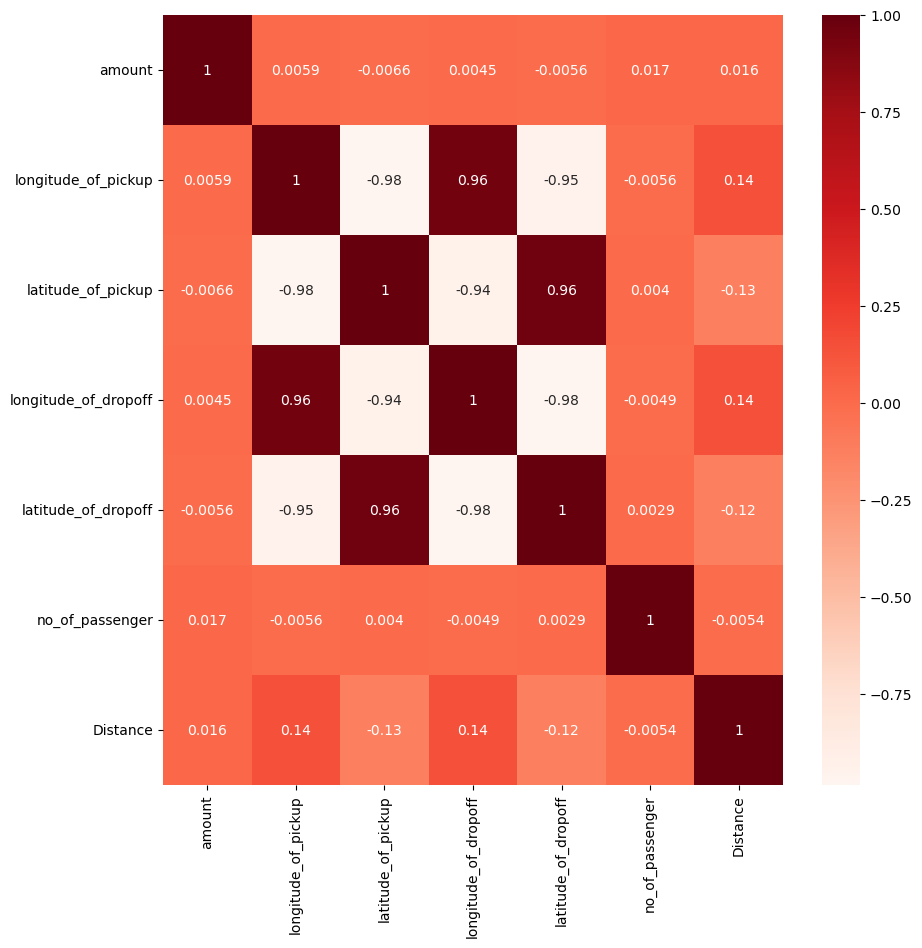

In [43]:
#get correlations of each features in dataset
corrmat = train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train_set[top_corr_features].corr(),annot=True,cmap="Reds")

In [44]:
X = train_set.drop(["amount","unique_id","date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1)
Y = train_set[["amount",]]

#X_train = train_set[['longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff','no_of_passenger']]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state=42, test_size = 0.30)

#X_train = train_set[['no_of_passenger', 'Distance']]
#Y_train = train_set['amount']
    

# SUPPORT VECTOR REGRESSION

In [45]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(X_train,Y_train)


print("The train set score:",model_svr.score(X_train,Y_train))

print("The Test set score:",model_svr.score(X_test,Y_test))


The train set score: 0.3303541289710502
The Test set score: 0.3530713737222444


# Predicted values

In [46]:
Y_predict_svr = model_svr.predict(X_test)
print("Predicted output: ",Y_predict_svr)
print(Y_predict_svr.shape)
print(Y_test.shape)


Predicted output:  [8.91379019 7.02776403 7.95919518 ... 7.33322353 7.22829143 7.86240142]
(14998,)
(14998, 1)


In [47]:
svr_score = model_svr.score(X_train,Y_train)
print(svr_score)

0.3303541289710502


## Creating an empty dataframe for storing the scores

In [48]:
Data = pd.DataFrame()

In [49]:
Data_model = pd.DataFrame({'Models': ['Support Vector Regression model'], 'Accuracy':[svr_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354


# DECISION TREE REGRESSOR

In [50]:
from sklearn import tree
modelTreeReg = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=8)
modelTreeReg.fit(X_train, Y_train)


ScoreTreeReg=modelTreeReg.score(X_train,Y_train)
print("The train score:",ScoreTreeReg)

TestscoreTreeReg=modelTreeReg.score(X_test,Y_test)
print("The Test score:",TestscoreTreeReg)

# if the difference between the train score and test score is less than 0.5 it is a overfitting model

The train score: 0.7299019560747211
The Test score: 0.7299037044109515


# Predicted values

In [51]:
predictTreeReg = modelTreeReg.predict(X_test)
print("Predicted output: ",predictTreeReg)

Predicted output:  [10.10340213  5.19351653  7.72275432 ...  6.00343771  5.19351653
  7.72275432]


In [52]:
tree_score = modelTreeReg.score(X_train,Y_train)
print(tree_score)

0.7299019560747211


In [53]:
Data_model = pd.DataFrame({'Models': ['Decision Tree Regression model'], 'Accuracy':[tree_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902


# Mean squared error 

MSE of DECISION TREE REGRESSOR

In [54]:
tree_mse = mean_squared_error(Y_test, predictTreeReg)
treeRMSE = np.sqrt(tree_mse)
print("Mean Squared error: ",treeRMSE)

Mean Squared error:  5.067089044771467


# Bagging model

In [55]:
from sklearn.ensemble import BaggingRegressor

model_bag=BaggingRegressor(n_estimators=9,max_features=1,max_samples=1.0, random_state=0)
model_bag.fit(X_train,Y_train)

print("The train set score:",model_bag.score(X_train,Y_train))

print("The Test set score:",model_bag.score(X_test,Y_test))


The train set score: 0.4753703201098174
The Test set score: 0.39050077959974305


# Predicted values

In [56]:
Y_predict_bag = model_bag.predict(X_test)
print("Predicted output: ",Y_predict_bag)
print(Y_predict_bag.shape)
print(Y_test.shape)

Predicted output:  [11.16641304  8.70151434  9.8570699  ...  8.99040323 10.32373657
  9.99040323]
(14998,)
(14998, 1)


In [57]:
bag_score = model_bag.score(X_train,Y_train)
print(bag_score)

0.4753703201098174


In [58]:
Data_model = pd.DataFrame({'Models': ['Bagging model'], 'Accuracy':[bag_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()



reg.fit(X_train,Y_train)

print("The train set score:",reg.score(X_train,Y_train))

print("The Test set score:",reg.score(X_test,Y_test))



#X_test = dev_set[['longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff','no_of_passenger']]

X_dev = dev_set[['no_of_passenger', 'Distance']]
Y_dev = dev_set['amount']
print(X_dev.head())

The train set score: 0.0005397763863843608
The Test set score: 0.000530087249452027
       no_of_passenger  Distance
31419                1  0.853205
37658                1  0.826951
24950                1  0.959952
17068                2  3.901551
5392                 5  0.779989


In [60]:
X_train.head()

,no_of_passenger,Distance
674,2,4.140762
4341,1,3.642009
20486,2,1.331995
14115,5,0.000000
3828,1,3.206763


# Coefficients of Multivariate Regression

In [61]:
reg.coef_

array([[0.13729979, 0.0003797 ]])

# Intercept

In [62]:
reg.intercept_

array([11.12466745])

# Predicted values of amount

In [63]:
Y_predictions = reg.predict(X_test)

print("Predicted output: ",Y_predictions)
print(Y_predictions.shape)
print(Y_test.shape)

Predicted output:  [[11.4003645 ]
 [11.26220473]
 [11.26263149]
 ...
 [11.26234469]
 [11.26229662]
 [11.26258715]]
(14998, 1)
(14998, 1)


# Plot the values of Actual and Predicted Values

(1.0, 10000.0)

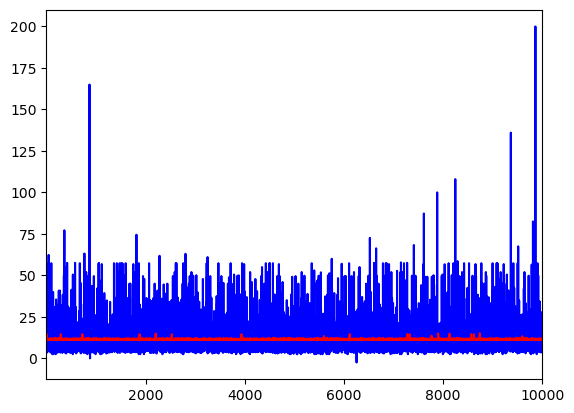

In [64]:
train_set.head()
#print(main_set.iloc[:,0:1].shape)
#print(Y_predictions)
Y_dev=np.asarray(dev_set['amount'])
#print(Y_predictions.shape)
#print(Y_test.shape)

plt.plot(Y_dev, color = 'blue')
plt.plot(Y_predictions, color = 'red')
plt.xlim(1,10000)

# RSME

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_predictions))
print(rmse)

9.74729443378838


In [66]:
linear_score = reg.score(X_train, Y_train)
print(linear_score)

0.0005397763863843608


In [67]:
Data_model = pd.DataFrame({'Models': ['linear Regression Model'], 'Accuracy':[linear_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370
0,linear Regression Model,0.000540


# Boosting model

In [68]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model_boost=AdaBoostRegressor(n_estimators=50)
model_grad=GradientBoostingRegressor()

model_boost.fit(X_train,Y_train)
model_grad.fit(X_train,Y_train)
print("AdaBoost model")
print("The train set score:",model_boost.score(X_train,Y_train))
print("The Test set score:",model_boost.score(X_test,Y_test))

print( )
print("GradientBoosting model")
print("The train set score:",model_grad.score(X_train,Y_train))
print("The Test set score:",model_grad.score(X_test,Y_test))



AdaBoost model
The train set score: 0.6628439296354238
The Test set score: 0.6614296410746465

GradientBoosting model
The train set score: 0.7497674279460242
The Test set score: 0.72387688523629


## Predicted values from adaboost model

In [69]:
Y_predict_ada = model_boost.predict(X_test)

print("Predicted output: ",Y_predict_ada)
print(Y_predict_ada.shape)
print(Y_test.shape)

Predicted output:  [8.00700832 8.00700832 8.00700832 ... 8.00700832 8.00700832 8.00700832]
(14998,)
(14998, 1)


In [70]:
Ada_score = model_boost.score(X_train,Y_train)
print(Ada_score)

0.6628439296354238


In [71]:
Data_model = pd.DataFrame({'Models': ['Ada Boost model'], 'Accuracy':[Ada_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370
0,linear Regression Model,0.000540
0,Ada Boost model,0.662844


## Predicted values from Gradientboost model

In [72]:
Y_predict_Grad = model_grad.predict(X_test)

print("Predicted output: ",Y_predict_Grad)
print(Y_predict_Grad.shape)
print(Y_test.shape)

Predicted output:  [10.0883511   4.94537461  7.57610701 ...  5.78494455  5.40008902
  7.37780467]
(14998,)
(14998, 1)


In [73]:
grad_score = model_grad.score(X_train,Y_train)
print(grad_score)

0.7497674279460242


In [74]:
Data_model = pd.DataFrame({'Models': ['Gradient Boosting model'], 'Accuracy':[grad_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370
0,linear Regression Model,0.000540
0,Ada Boost model,0.662844
0,Gradient Boosting model,0.749767


# RANDOM FOREST REGRESSOR

In [75]:
randomForest = RandomForestRegressor(n_estimators=10,random_state=0,min_samples_split=40)
randomForest.fit(X_train, Y_train)

#print("---------RANDOM FOREST----------")
print("Training score: ",randomForest.score(X_train,Y_train))
print("Test score: ",randomForest.score(X_test,Y_test))

randomForestPredict = randomForest.predict(X_test)
print("Predicted output: ",randomForestPredict)
randomForest_RMSE = np.sqrt(mean_squared_error(Y_test, randomForestPredict))
print("Mean Squared error: ",randomForest_RMSE)


Training score:  0.7816549402806381
Test score:  0.7142177621984562
Predicted output:  [9.88734774 4.61937236 7.51857545 ... 5.62837601 5.22159786 7.91722778]
Mean Squared error:  5.21214919528119


# IMPROVED RANDOM FOREST REGRESSOR

In [76]:
model = RandomForestRegressor(n_estimators=10, max_features=10, max_depth=20, min_samples_split=50,
                              min_samples_leaf=2, random_state=0)
randomForestImproved = model.fit(X_train,Y_train)

#print("---------IMPROVED RANDOM FOREST------------")
print(randomForestImproved.score(X_train,Y_train))
print(randomForestImproved.score(X_test,Y_test))

randomForestImprovedPredict=model.predict(X_test)
randomForestImproved_mse = mean_squared_error(Y_test, randomForestImprovedPredict)
randomForestImprovedMSE = np.sqrt(randomForestImproved_mse)
print("Mean Squared error: ",randomForestImprovedMSE)

0.7648495026363644
0.7220481083107102
Mean Squared error:  5.140247605362988


# Predicted values

In [77]:
randomForestImprovedPredict = randomForestImproved.predict(X_test)
print("Predicted output: ",randomForestImprovedPredict)

Predicted output:  [9.96863723 4.81843927 7.23618701 ... 5.74017682 5.24359472 7.71469761]


In [78]:
rf_score = model.score(X_train,Y_train)
print(rf_score)

0.7648495026363644


In [79]:
Data_model = pd.DataFrame({'Models': ['Random Forest Regressor model'], 'Accuracy':[rf_score]})
Data = pd.concat( [Data,Data_model])
Data = Data[['Models', 'Accuracy']]
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370
0,linear Regression Model,0.000540
0,Ada Boost model,0.662844
0,Gradient Boosting model,0.749767
0,Random Forest Regressor model,0.764850


#  Data

In [80]:
Data

,Models,Accuracy
0,Support Vector Regression model,0.330354
0,Decision Tree Regression model,0.729902
0,Bagging model,0.475370
0,linear Regression Model,0.000540
0,Ada Boost model,0.662844
0,Gradient Boosting model,0.749767
0,Random Forest Regressor model,0.764850
